# Startup Expansion Analysis 

## Importing Libraries

In [1]:
pip install folium geopandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import folium
import geopandas as gpd
from geopandas.tools import geocode
from geopy.geocoders import Nominatim


## Importing & Inserting Data

In [4]:
import pandas as pd

# Specify the file path
file_path = '/kaggle/input/startupexpansion/startup-expansion.xlsx'

# Read the Excel file into a DataFrame
try:
    startup = pd.read_excel(file_path)
    print("File loaded successfully.")
except Exception as e:
    print(f"Error loading the file: {e}")


File loaded successfully.


In [5]:
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [6]:
startup.info

<bound method DataFrame.info of      Store ID             City       State Sales Region New Expansion  \
0           1           Peoria     Arizona     Region 2           Old   
1           2          Midland       Texas     Region 2           Old   
2           3          Spokane  Washington     Region 2           Old   
3           4           Denton       Texas     Region 2           Old   
4           5    Overland Park      Kansas     Region 2           Old   
..        ...              ...         ...          ...           ...   
145       146         Paterson  New Jersey     Region 1           New   
146       147      Brownsville       Texas     Region 2           New   
147       148         Rockford    Illinois     Region 1           New   
148       149  College Station       Texas     Region 2           New   
149       150    Thousand Oaks  California     Region 2           New   

     Marketing Spend  Revenue  
0               2601    48610  
1               2727    456

In [7]:
startup[[('Marketing Spend'),('Revenue')]].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


## Preprossing Data

In [8]:
startup['City'].nunique()

149

In [9]:
startup['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [10]:
startup['City'].value_counts()

City
Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: count, Length: 149, dtype: int64

In [11]:
startup['State'].nunique()

35

In [12]:
startup['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

In [13]:
startup['State'].value_counts()

State
California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: count, dtype: int64

In [14]:
startup['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [15]:
startup['Sales Region'].value_counts()

Sales Region
Region 2    86
Region 1    64
Name: count, dtype: int64

In [16]:
startup['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

In [17]:
startup['New Expansion'].value_counts()

New Expansion
Old    140
New     10
Name: count, dtype: int64

In [18]:
startup.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [19]:
startup.duplicated().sum()

0

In [20]:
startup['Store ID'].value_counts()

Store ID
1      1
95     1
97     1
98     1
99     1
      ..
51     1
52     1
53     1
54     1
150    1
Name: count, Length: 150, dtype: int64

In [21]:
len(startup['Store ID'].value_counts())

150

## Exploring & Analysis Data

In [22]:
startup.sample(15)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
43,44,Carrollton,Texas,Region 2,Old,3146,49191
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
57,58,Waterbury,Connecticut,Region 1,Old,3392,19350
17,18,Fontana,California,Region 2,Old,3085,63027
60,61,Columbia,South Carolina,Region 1,Old,2874,42803
143,144,Rancho Cucamonga,California,Region 2,New,2945,52366
101,102,Coral Springs,Florida,Region 1,Old,3079,41319
84,85,Greeley,Colorado,Region 2,Old,3277,48796
142,143,Joliet,Illinois,Region 1,New,3279,48315
148,149,College Station,Texas,Region 2,New,2994,22457


In [23]:
startup[startup['New Expansion'] == 'New'].groupby('State').sum()['Revenue'].nlargest(10)

State
California    141883
Illinois       91692
Texas          85605
Tennessee      55357
Arizona        48954
New Jersey     34603
Name: Revenue, dtype: int64

In [24]:
startup[startup['New Expansion'] == 'Old'].groupby('State').sum()['Revenue'].nlargest(10)

State
California     1362468
Texas           554964
Florida         479023
Washington      298013
Alabama         221025
New York        160046
Connecticut     158511
Georgia         157656
Colorado        156495
Michigan        147759
Name: Revenue, dtype: int64

In [25]:
startup['Profit'] = startup['Revenue'] -  startup['Marketing Spend']
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [26]:
startup['ROMS'] = round((startup['Profit'] /  startup['Marketing Spend'])*100,2)
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38
...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07


In [27]:
startup['ROMS%'] = startup['ROMS']/100
startup

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1768.90,17.6890
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.43,15.7543
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.25,16.9025
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1287.60,12.8760
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.38,19.8738
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.23,14.3723
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.31,16.1831
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.10,15.3810
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.07,6.5007


## City Distribution:

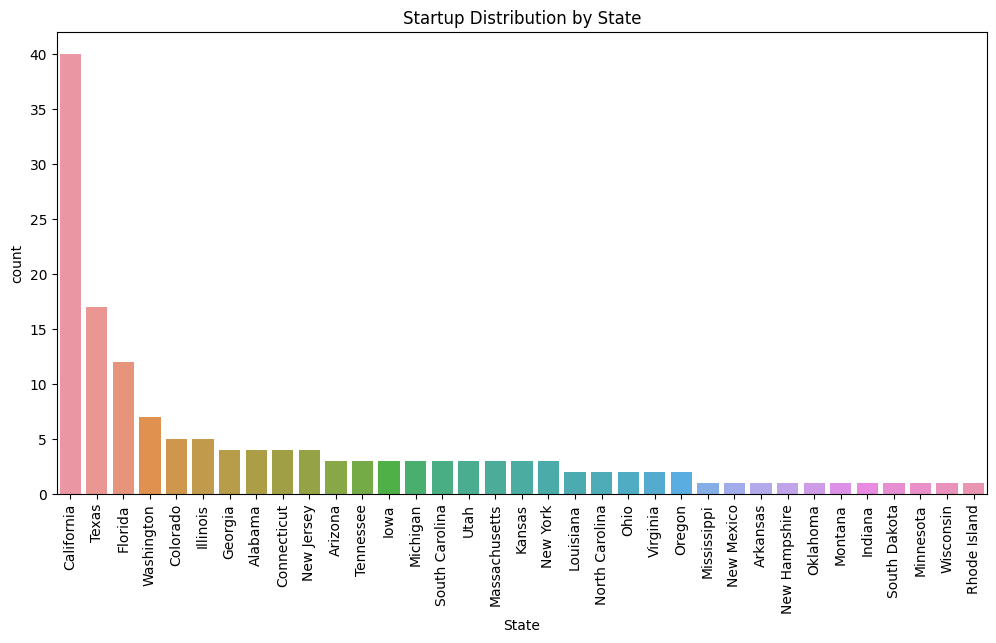

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=startup, order=startup['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Startup Distribution by State')
plt.show()


## Sales Region Analysis

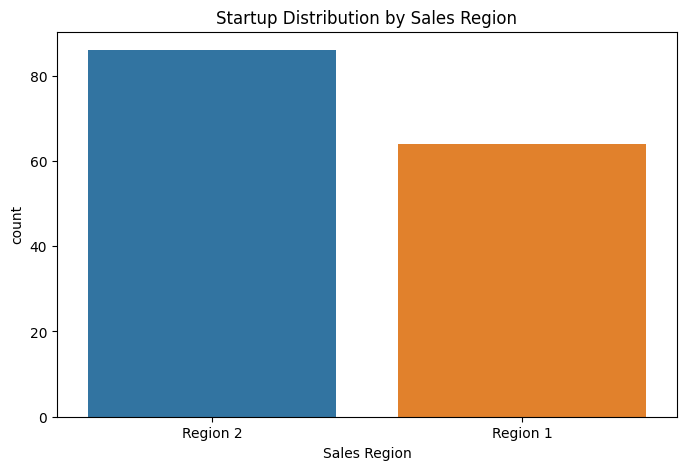

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sales Region', data=startup)
plt.title('Startup Distribution by Sales Region')
plt.show()


## New vs. Old Expansion

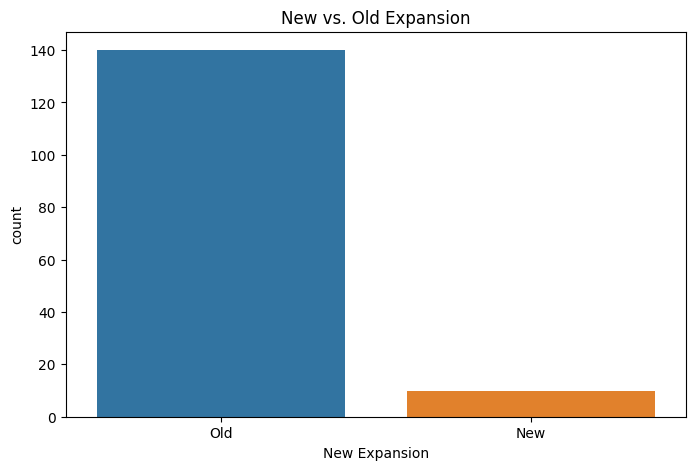

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='New Expansion', data=startup)
plt.title('New vs. Old Expansion')
plt.show()


## Revenue Analysis:

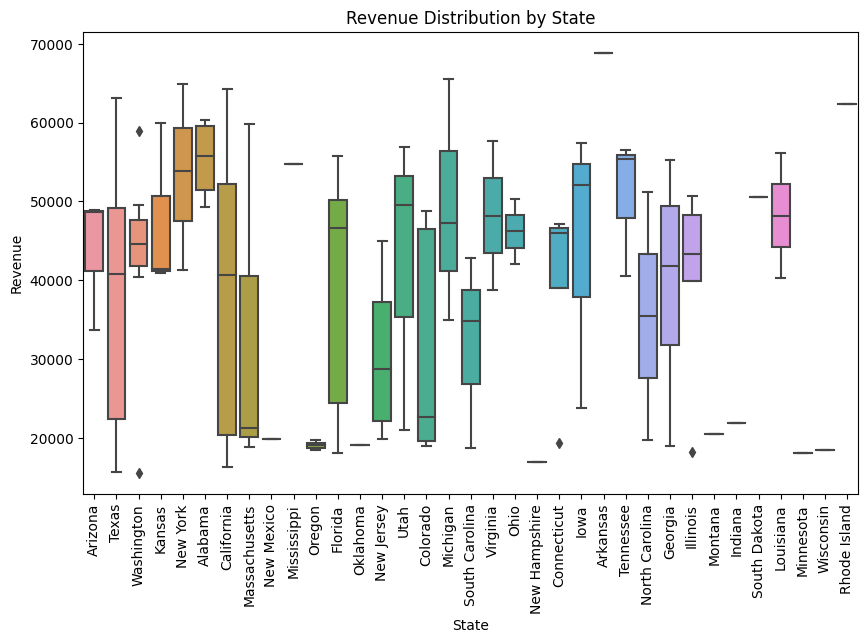

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='State', y='Revenue', data=startup)
plt.title('Revenue Distribution by State')
plt.xticks(rotation=90)
plt.show()


## Marketing Spend Analysis

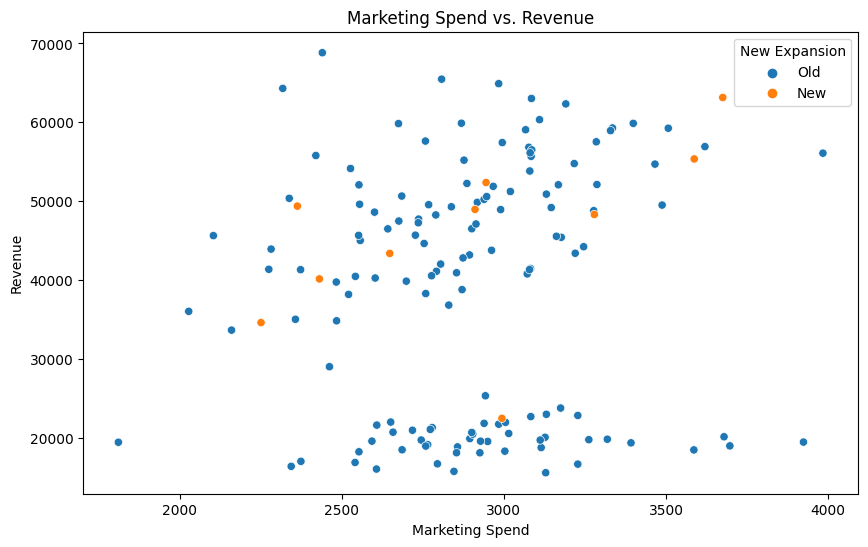

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marketing Spend', y='Revenue', hue='New Expansion', data=startup)
plt.title('Marketing Spend vs. Revenue')
plt.show()


## 

In [33]:
startup.to_csv('startup_modefied.csv')

In [34]:
import folium
import pandas as pd
import geopandas as gpd
from geopy.geocoders import Nominatim

# Create a base map centered on the US
startup_map = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Load US state boundaries for mapping
us_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_states = us_states[(us_states['name'] != "Hawaii") & (us_states['name'] != "Alaska")]

# Initialize geolocator
geolocator = Nominatim(user_agent="startup_analysis")

# Define a function to assign color based on revenue
def assign_color(revenue):
    if revenue < 30000:
        return 'red'
    elif revenue < 60000:
        return 'orange'
    else:
        return 'green'

# Add markers for each city with colored icons based on revenue
for index, row in startup.iterrows():
    city = row['City']
    state = row['State']
    revenue = row['Revenue']
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        lat = location.latitude
        lon = location.longitude
        # Determine marker color based on revenue
        color = assign_color(revenue)
        # Create a popup with city, state, and revenue info
        popup_text = f"<b>{city}, {state}</b><br>Revenue: ${revenue:,}"
        folium.Marker([lat, lon], popup=popup_text, icon=folium.Icon(color=color)).add_to(startup_map)

# Add US state boundaries
for _, r in us_states.iterrows():
    state_geojson = r['geometry']
    folium.GeoJson(state_geojson).add_to(startup_map)

# Save the map to an HTML file
startup_map.save("startup_revenue_map.html")

# Display the map
startup_map


/tmp/ipykernel_19/1106860806.py:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  us_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
